# Real time: FRB 220319aaeb (SNR42, nearby)|

In [1]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, sgram_fn, gauss, gauss_norm, model_free_4,model_free, power_law
from burstfit.utils.plotter import plot_fit_results, plot_2d_fit 
from burstfit.io import BurstIO
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
# use Liam's function to read in filterbank files 
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software')
import filplot_funcs_gc as ff

#from burstfit.utils.functions import gauss_norm2, pulse_fn_vec, sgram_fn_vec 
%matplotlib inline 


# input variables 
candidate = '220319aaeb'
#datestring = '2022_2_6_19_34_4'
beam = 172
#corr = 'corr09'
dm_heimdall = 111
width_heimdall = 1 
snr_heimdall = 41.7
mask_chans=[] 

#fil_file ='/data/dsa110/T1/'+corr + '/' + datestring + '/fil_'+candidate+'/'+candidate+'_'+str(beam)+'.fil'
fil_file = '/home/ubuntu/vikram/scratch/220319aaeb.fil'
save_name = candidate + '_beam_'+str(beam)
save_dir = '/home/ubuntu/gechen/burstfit_tests_outputs/' 


#data = ff.proc_cand_fil(fil_file, dm, width, nfreq_plot=64, ndm=64)[0]
#data_t = data.mean(0)

logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)
# create burst object 
bd = BurstData(
    fp=fil_file,
    dm=dm_heimdall ,
    tcand=0.5, # pulse starting time in s.
    width=width_heimdall,  
    snr=snr_heimdall
)

bd.prepare_data()

# number of channels after binning 
# requires each channel bin to have SNR_min 
# snr_heimdall was calculated with all 256 channels binned into one 
SNR_min = 5 # check?  
n_per_bin = int(256. / (1.0*snr_heimdall / SNR_min)**2) 
if n_per_bin <= 1:
    n_per_bin = 1
elif not math.log(n_per_bin, 2).is_integer():
    n_per_bin = 2 ** (int(np.log2(n_per_bin))+1)
    
nfreq = int(256 / n_per_bin) 
print(nfreq)
#nfreq = 4

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


2022-05-12 23:34:55,030 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-05-12 23:34:56,030 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-05-12 23:34:56,032 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-05-12 23:34:56,034 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (masked, masked)


64


## de-disperse data (or read from file) and chop near the burst time

In [2]:
# # save the de-dispersed data to file (de-dispersion takes long time)
# nfreq = 64

# data = ff.proc_cand_fil(fil_file, bd.dm, bd.width, nfreq_plot=nfreq, ndm=64)[0]
# np.save('220319aaeb_%d.txt'%nfreq, data, allow_pickle=False)


In [4]:
# chop near the burst region and plot 
i_low = int(0.508/bd.tsamp - 100*bd.width)
i_high = int(0.508/bd.tsamp + 100*bd.width)

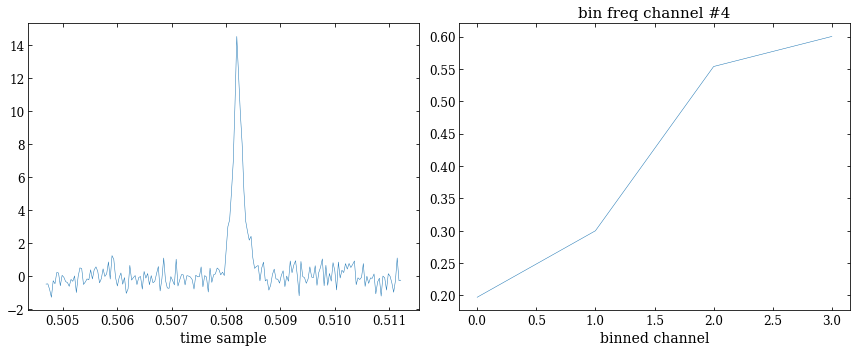

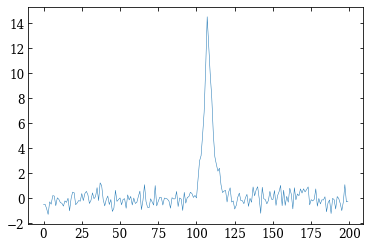

In [5]:
# read in de-dispersed data file
nfreq = 4

data = np.load('220319aaeb_%d.txt.npy'%nfreq)

# chop near the burst region and plot 
data_burst = data[:, i_low: i_high] # change to x * width 
t_burst = [i * bd.tsamp for i in range(i_low, i_high)]

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5)) 
#fig1.set_size_inches(12., 5.)
ax1[0].plot(t_burst, data_burst.mean(0))
ax1[0].set_xlabel('time sample')
ax1[1].plot(data_burst.mean(1))
ax1[1].set_xlabel('binned channel')
ax1[1].set_title('bin freq channel #%d'%nfreq)
plt.tight_layout()

plt.figure()
plt.plot(data_burst.mean(0))

## Fit with models

### bf_S1T2_cx: model-free spectrum + gaussian with scattering profile + x components

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c0', 'c1', 'c2', 'c3']


2022-05-12 23:35:20,960 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-12 23:35:20,963 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-12 23:35:20,970 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-05-12 23:35:20,974 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-05-12 23:35:20,979 - tests -root - INFO - P values: T-test (0.22007), Kruskal (0.24800), KS (0.28267), F-test (0.50978)
2022-05-12 23:35:20,984 - run_tests -burstfit.fit - INFO - On pulse residual is similar to left off pulse region.
2022-05-12 23:35:20,986 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-05-12 23:35:20,995 - tests -root - INFO - P values: T-test (0.38065), Kruskal (0.46225), KS (0.66014), F-test (0.32364)
2022-05-12 23:35:20,997 - run_tests -burstfit.fit - INFO - On pulse residual is similar to right off pulse region.
2022-0

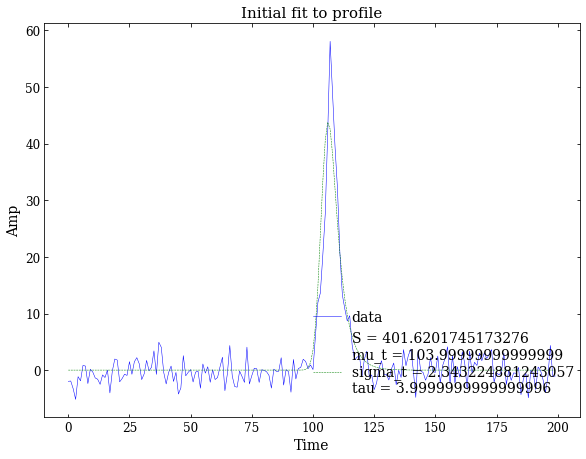

2022-05-12 23:35:21,342 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-05-12 23:35:21,344 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f8323388f28>
[0.08549967 0.27269894 0.43279794 0.50350654]


2022-05-12 23:35:21,352 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-05-12 23:35:21,354 - initial_spectrafit -burstfit.fit - INFO - c0: 0.08549966663122177 +- 0.0
2022-05-12 23:35:21,355 - initial_spectrafit -burstfit.fit - INFO - c1: 0.27269893884658813 +- 0.0
2022-05-12 23:35:21,357 - initial_spectrafit -burstfit.fit - INFO - c2: 0.43279793858528137 +- 0.0
2022-05-12 23:35:21,359 - initial_spectrafit -burstfit.fit - INFO - c3: 0.5035065412521362 +- 0.0


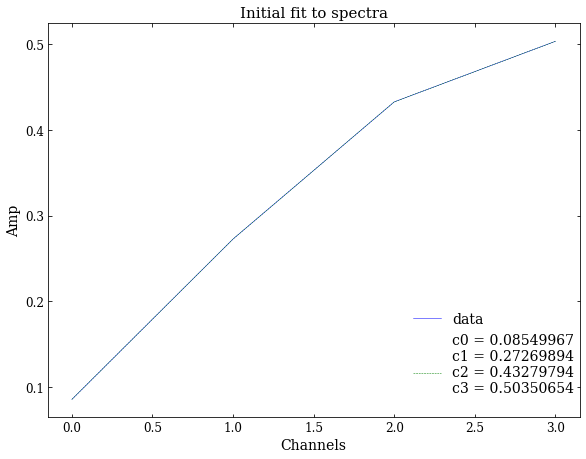

2022-05-12 23:35:21,537 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-05-12 23:35:21,540 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08549967, 0.27269894, 0.43279794, 0.50350654, 401.6201745173276, 103.99999999999999, 2.343224881243057, 3.9999999999999996, 111]
2022-05-12 23:35:21,706 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-05-12 23:35:21,709 - sgram_fit -burstfit.fit - INFO - c0: 0.07358448702045861 +- 0.00995714840492503
2022-05-12 23:35:21,712 - sgram_fit -burstfit.fit - INFO - c1: 0.21636240139585786 +- 0.01133612365999723
2022-05-12 23:35:21,713 - sgram_fit -burstfit.fit - INFO - c2: 0.3522125938066658 +- 0.010209971294568654
2022-05-12 23:35:21,715 - sgram_fit -burstfit.fit - INFO - c3: 0.3880837024706105 +- 0.012354598209203276
2022-05-12 23:35:21,717 - sgram_fit -burstfit.fit - INFO - S: 397.2231342812425 +- 7.319850056360699
2022-05-12 23:35:21,719 - sgram_fit -burstfit.fit - INFO - mu_t:

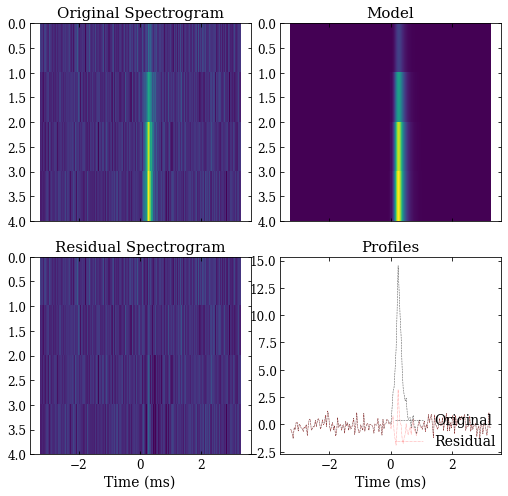

2022-05-12 23:35:22,290 - model -burstfit.fit - INFO - Making model.
2022-05-12 23:35:22,294 - model -burstfit.fit - INFO - Found 1 components.
2022-05-12 23:35:22,298 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-05-12 23:35:22,302 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-05-12 23:35:22,304 - model -burstfit.fit - INFO - Making model.
2022-05-12 23:35:22,306 - model -burstfit.fit - INFO - Found 1 components.
2022-05-12 23:35:22,310 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.2647856592813111
2022-05-12 23:35:22,315 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-05-12 23:35:22,317 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-05-12 23:35:22,321 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-05-12 23:35:22,326 - run

bf_S1T2_c1.calc_redchisq()= 1.2647856592813111


In [6]:
# bf_S1T2_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

sgram_bounds=((0, 0.45, 0),(np.inf, 0.55, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c1 for later model selection 
bf_S1T2_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c1.validate()
bf_S1T2_c1.precalc()


# fit tests
#bf_S1T2_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c1.initial_spectrafit(plot = True)

#bf_S1T2_c1.fitcycle(plot=True) # fit for one component.
bf_S1T2_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T2_c1.calc_redchisq()=', bf_S1T2_c1.calc_redchisq())

# plot fit for all components 
# plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
#                  bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]



In [17]:
# mcmc_kwargs = {}
# mcmc_kwargs = {'nwalkers':60, 'nsteps':int(1e4),
#            'skip':500, 'ncores':4, 
#            'start_pos_dev':0.01,
#            'prior_range':0.8, 
#            'save_results':True,
#            'outname':'test_file'}

# bf_S1T2_c1.run_mcmc(plot=True, **mcmc_kwargs)


In [18]:
# # bf_S1T2_c2: two components
# #data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
# #fit models  
# # For pulse, we will use a gaussian convolved with an exponential model 
# # S: Area of the pulse (fluence)
# # mu: means of gaussians for each channel
# # sigma: sigma of gaussian
# # tau: scattering timescale for each channel
# ncomp = 2 

# pnames = ['S', 'mu_t', 'sigma_t', 'tau']
# pulseModel = Model(pulse_fn_vec, param_names=pnames)
# profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


# nfreq = 4
# # For spectrum, try model-free  
# nfreq_model = nfreq # try less 
# snames = [0] * nfreq_model

# for i in range(nfreq_model):
#     snames[i] = 'c'+str(i)

# print('snames:', snames)
# spectraModel = Model(model_free_4, param_names=snames)
# #spectraModel = Model(model_free, param_names=snames)





# sgram_mask = np.full(np.shape(data_burst), False)
# #sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
# #                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

# sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
#                         mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

# #sgram_bounds=((0, 0.45, 0, -np.inf),(np.inf, 0.55, np.inf, np.inf)) # did not work when only set up bounds but do not chop data 

# # Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# # initial fit: use heimdall results 
# # rename bf_S1T2_c2 for later model selection 
# bf_S1T2_c2 = BurstFit(
#     sgram_model=sgramModel,
#     sgram=data_burst, 
#     width=width_heimdall,
#     dm=dm_heimdall,
#     foff=bd.foff * 1024 / nfreq,
#     fch1=bd.fch1,
#     tsamp=bd.tsamp,
#     clip_fac=bd.clip_fac,
#     mask= sgram_mask, 
#     mcmcfit=False,
#     #comp_num = 1, 
# )


# # Some setting up before we do the fitting 
# bf_S1T2_c2.validate()
# bf_S1T2_c2.precalc()


# # fit tests
# #bf_S1T2_c2.initial_profilefit(bounds = profile_bounds, plot = True)
# #bf_S1T2_c2.initial_spectrafit(plot = True)

# #bf_S1T2_c2.fitcycle(plot=True) # fit for one component.
# bf_S1T2_c2.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
# bf_S1T2_c2.calc_redchisq()

# # plot fit for all components 
# # plot_fit_results(bf_S1T2_c2.sgram, bf_S1T2_c2.sgram_model.evaluate, bf_S1T2_c2.sgram_params['all'][1]['popt'], 
# #                  bf_S1T2_c2.tsamp, bf_S1T2_c2.fch1, bf_S1T2_c2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
# #dm_fit, dm_fit_err = bf_S1T2_c2.sgram_params['all'][1]['popt'][-1], bf_S1T2_c2.sgram_params['all'][1]['perr'][-1]

# bf_S1T2_c2.sgram_params

### bf_S1T1_cx: model-free spectrum + gaussian profile NO scattering + x-component 

self.function_input_names:  ['S', 'mu', 'sigma']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-18 22:38:28,224 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-18 22:38:28,690 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2022-04-18 22:38:28,693 - initial_profilefit -burstfit.fit - INFO - S: 9.731155702437924 +- 5.611100827416538e-05
2022-04-18 22:38:28,695 - initial_profilefit -burstfit.fit - INFO - mu_t: 107.00068707488218 +- 8.410004071149072e-05
2022-04-18 22:38:28,697 - initial_profilefit -burstfit.fit - INFO - sigma_t: 0.06682853858439418 +- 0.00816967017840281


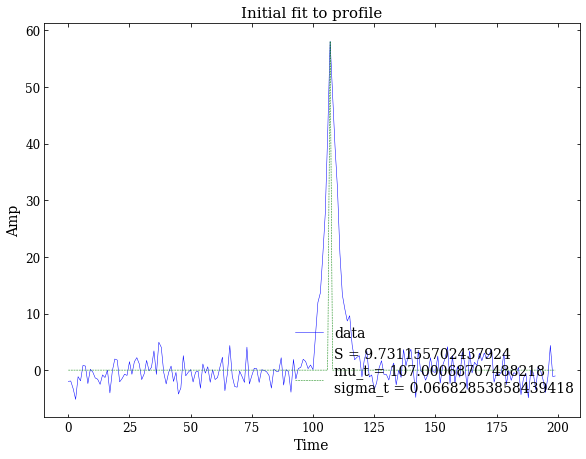

2022-04-18 22:38:28,847 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-04-18 22:38:28,850 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-18 22:38:29,245 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2022-04-18 22:38:29,249 - initial_profilefit -burstfit.fit - INFO - S: 9.731155702437924 +- 5.611100827416538e-05
2022-04-18 22:38:29,252 - initial_profilefit -burstfit.fit - INFO - mu_t: 107.00068707488218 +- 8.410004071149072e-05
2022-04-18 22:38:29,254 - initial_profilefit -burstfit.fit - INFO - sigma_t: 0.06682853858439418 +- 0.00816967017840281


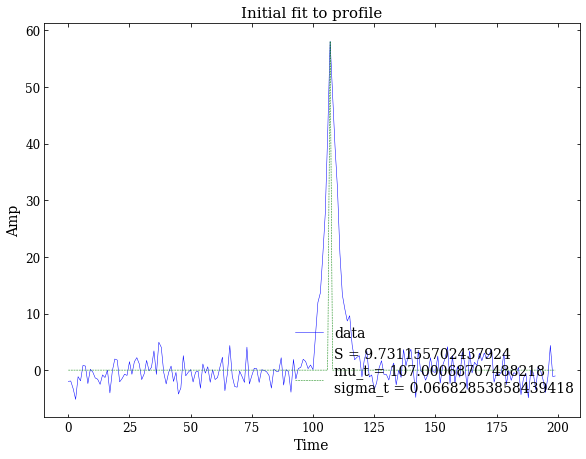

2022-04-18 22:38:29,403 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-18 22:38:29,406 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f811fa956a8>
[0.08597253 0.2655621  0.44683236 0.48923844]


2022-04-18 22:38:29,413 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-18 22:38:29,414 - initial_spectrafit -burstfit.fit - INFO - c0: 0.08597253262996674 +- 0.0
2022-04-18 22:38:29,416 - initial_spectrafit -burstfit.fit - INFO - c1: 0.2655620872974396 +- 0.0
2022-04-18 22:38:29,417 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4468323588371277 +- 0.0
2022-04-18 22:38:29,418 - initial_spectrafit -burstfit.fit - INFO - c3: 0.489238440990448 +- 0.0


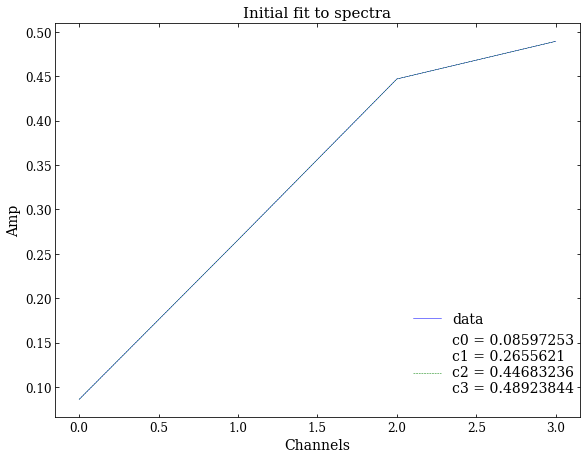

2022-04-18 22:38:29,566 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-18 22:38:29,568 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.08597253, 0.2655621, 0.44683236, 0.48923844, 9.731155702437924, 107.00068707488218, 0.06682853858439418, 111]
2022-04-18 22:38:29,640 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-04-18 22:38:35,679 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-18 22:38:35,682 - sgram_fit -burstfit.fit - INFO - c0: 0.07774240319406699 +- 1859068.5047533498
2022-04-18 22:38:35,685 - sgram_fit -burstfit.fit - INFO - c1: 0.22247538955794316 +- 5320095.2479161965
2022-04-18 22:38:35,687 - sgram_fit -burstfit.fit - INFO - c2: 0.47429170851735136 +- 11341825.592219107
2022-04-18 22:38:35,690 - sgram_fit -burstfit.fit - INFO - c3: 0.5518949886623296 +- 13197567.212356474
2022-04-18 22:38:35,692 - sgram_fit -burstfit.fit - INFO - S: 9

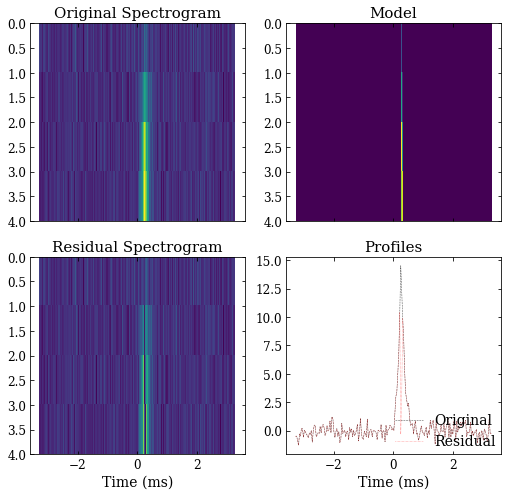

2022-04-18 22:38:36,093 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:38:36,096 - model -burstfit.fit - INFO - Found 1 components.
2022-04-18 22:38:36,100 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-18 22:38:36,102 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-18 22:38:36,104 - model -burstfit.fit - INFO - Making model.
2022-04-18 22:38:36,106 - model -burstfit.fit - INFO - Found 1 components.
2022-04-18 22:38:36,110 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 1.8104170563698823
2022-04-18 22:38:36,112 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-18 22:38:36,114 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-18 22:38:36,118 - tests -root - INFO - P values: T-test (0.63133), Kruskal (0.52861), KS (0.98011), F-test (0.68505)
2022-04-18 22:38:36,120 - run

bf_S1T1_c1.calc_redchisq()= 1.8104170563698823


In [12]:
# # bf_S1T1_c1: single component 
# #data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
# #fit models  
# # For pulse, we will use a gaussian convolved with an exponential model 
# # S: Area of the pulse (fluence)
# # mu: means of gaussians for each channel
# # sigma: sigma of gaussian
# # tau: scattering timescale for each channel

# ncomp = 1 

# pnames = ['S', 'mu_t', 'sigma_t'] # , 'tau'
# pulseModel = Model(gauss, param_names=pnames)
# profile_bounds=[(0, 0, 0),(np.inf, np.shape(data_burst)[1], np.inf)]


# nfreq = 4
# # For spectrum, try model-free  
# nfreq_model = nfreq # try less 
# snames = [0] * nfreq_model

# for i in range(nfreq_model):
#     snames[i] = 'c'+str(i)

# print('snames:', snames)
# spectraModel = Model(model_free_4, param_names=snames)
# #spectraModel = Model(model_free, param_names=snames)





# sgram_mask = np.full(np.shape(data_burst), False)
# #sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
# #                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

# sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
#                         mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

# sgram_bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf, np.shape(data_burst)[1], np.inf)) # did not work when only set up bounds but do not chop data 

# # Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# # initial fit: use heimdall results 
# # rename bf_S1T1_c1 for later model selection 
# bf_S1T1_c1 = BurstFit(
#     sgram_model=sgramModel,
#     sgram=data_burst, 
#     width=width_heimdall,
#     dm=dm_heimdall,
#     foff=bd.foff * 1024 / nfreq,
#     fch1=bd.fch1,
#     tsamp=bd.tsamp,
#     clip_fac=bd.clip_fac,
#     mask= sgram_mask, 
#     mcmcfit=False,
#     #comp_num = 1, 
# )


# # Some setting up before we do the fitting 
# bf_S1T1_c1.validate()
# bf_S1T1_c1.precalc()


# # fit tests
# bf_S1T1_c1.initial_profilefit(bounds = profile_bounds, plot = True)
# #bf_S1T1_c1.initial_spectrafit(plot = True)

# bf_S1T1_c1.fitcycle(plot=True, profile_bounds = profile_bounds) # fit for one component.
# bf_S1T1_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
# print('bf_S1T1_c1.calc_redchisq()=', bf_S1T1_c1.calc_redchisq())

# # plot fit for all components 
# # plot_fit_results(bf_S1T1_c1.sgram, bf_S1T1_c1.sgram_model.evaluate, bf_S1T1_c1.sgram_params['all'][1]['popt'], 
# #                  bf_S1T1_c1.tsamp, bf_S1T1_c1.fch1, bf_S1T1_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
# #dm_fit, dm_fit_err = bf_S1T1_c1.sgram_params['all'][1]['popt'][-1], bf_S1T1_c1.sgram_params['all'][1]['perr'][-1]

# #bf_S1T1_c1.sgram_params

In [ ]:
# save fitting results 
bd.prepare_data()
bio = BurstIO(bf, bd)
d = bio.save_results(outname=save_name+"_fit_results.json", outdir=save_dir)  
print(d['param_names'])

In [19]:
# # saving key burst paramters 
# mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc = bf.mcmc_params[1]['popt']
# mu_f_mcmc_err, sigma_f_mcmc_err, s_mcmc_err, mu_t_mcmc_err, sigma_t_mcmc_err, tau_mcmc_err, dm_mcmc_err = bf.mcmc_params[1]['perr']

# t0 = 0.45 + mu_t_mcmc * bd.tsamp
# t0_err = [i * bd.tsamp for i in mu_t_mcmc_err] 

# width_ms = sigma_t_mcmc * bd.tsamp * 1e3 # in ms
# width_ms_err = [i * bd.tsamp for i in sigma_t_mcmc_err] 

# # with open(save_dir+save_name+"_fit_key_results.txt") as f:
# #     print('mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc')
# #     print(bf.mcmc_params[1]['popt'])
# #     print('lower, upper bounds')
# #     print(bf.mcmc_params[1]['perr'])

# #outname=save_name+"_fit_results.json", outdir=save_dir